**Using TensorFlow Like NumPy**
--

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2024-05-16 15:12:24.451999: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-16 15:12:24.452131: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-16 15:12:24.577371: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Tensors and Operations

**Constants**

In [2]:
# Constant Tensors
first_tensor = tf.constant([
    [1, 2, 3],
    [4, 5, 6]
])

# Scaler Constants
sc_constant = tf.constant(1730)

print("Scaler\n", sc_constant)
print("\nScaler Shape: ", sc_constant.shape)
print("\nScaler Datatype: ", sc_constant.dtype)

print("\nTensor\n", first_tensor)
print("\nTensor Shape: ", first_tensor.shape)
print("\nTensor Datatype: ", first_tensor.dtype)

Scaler
 tf.Tensor(1730, shape=(), dtype=int32)

Scaler Shape:  ()

Scaler Datatype:  <dtype: 'int32'>

Tensor
 tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)

Tensor Shape:  (2, 3)

Tensor Datatype:  <dtype: 'int32'>


In [3]:
# Raw Tensor Representation
first_tensor

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

**Indexing**: Works similar to NumPy Arrays

In [4]:
print("Viewing the first column: ", first_tensor[:, -3])
print("\nViewing the last column: ", first_tensor[:, 2])
print("\nViewing the first elements of each row: ", first_tensor[:, :2])

Viewing the first column:  tf.Tensor([1 4], shape=(2,), dtype=int32)

Viewing the last column:  tf.Tensor([3 6], shape=(2,), dtype=int32)

Viewing the first elements of each row:  tf.Tensor(
[[1 2]
 [4 5]], shape=(2, 2), dtype=int32)


In [5]:
# New 1D Tensor
new_tensor = tf.constant(
    [10, 20, 30]
)
print("Shape of new tensor (Originally): ", new_tensor.shape)

# Expanding the Dimensions of the Tensor
print("Shape of new tensor (After tf.newaxis): ", new_tensor[:, tf.newaxis])

# Expanding accross the last dimension
print("Shape of new tensor (After expand_dims): ", tf.expand_dims(new_tensor, axis=1))

# Expanding accross the first dimension
print("Shape of new tensor (After expand_dims): ", tf.expand_dims(new_tensor, axis=0))

Shape of new tensor (Originally):  (3,)
Shape of new tensor (After tf.newaxis):  tf.Tensor(
[[10]
 [20]
 [30]], shape=(3, 1), dtype=int32)
Shape of new tensor (After expand_dims):  tf.Tensor(
[[10]
 [20]
 [30]], shape=(3, 1), dtype=int32)
Shape of new tensor (After expand_dims):  tf.Tensor([[10 20 30]], shape=(1, 3), dtype=int32)


**Broadcasting**: Works similar to NumPy Arrays

In [6]:
first_tensor + 10

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[11, 12, 13],
       [14, 15, 16]], dtype=int32)>

**Operations (Ops)**

- On adding first_tensor + 10 the compiler inherently calls the tf.add(first_tensor, 10)
- Other supported operations -, *, /, @ (Matrix Multiplication)

In [7]:
# Other common ops
second_tensor = tf.constant([
    [11, 12, 13],
    [14, 15, 16]
])

print("Addition\n", first_tensor + second_tensor)
print("\nSubtraction\n", first_tensor - second_tensor)
print("\nElement-wise Multiplication\n", first_tensor * second_tensor)
print("\nMatrix Multiplication\n", first_tensor @ tf.transpose(second_tensor))
print("\nSquare\n", tf.square(first_tensor))
print("\nTranspose\n", tf.transpose(first_tensor))

Addition
 tf.Tensor(
[[12 14 16]
 [18 20 22]], shape=(2, 3), dtype=int32)

Subtraction
 tf.Tensor(
[[-10 -10 -10]
 [-10 -10 -10]], shape=(2, 3), dtype=int32)

Element-wise Multiplication
 tf.Tensor(
[[11 24 39]
 [56 75 96]], shape=(2, 3), dtype=int32)

Matrix Multiplication
 tf.Tensor(
[[ 74  92]
 [182 227]], shape=(2, 2), dtype=int32)

Square
 tf.Tensor(
[[ 1  4  9]
 [16 25 36]], shape=(2, 3), dtype=int32)

Transpose
 tf.Tensor(
[[1 4]
 [2 5]
 [3 6]], shape=(3, 2), dtype=int32)


## Tensors and NumPy

- Arrays created using NumPy accept TensorFlow operations
- Similarly Tensors created using TensorFlow accept NumPy operations
- NumPy always applies operations using 64bit datatypes while TensorFlow applies all its operations using 32bit datatypes

In [8]:
# NumPy array
np_arr = np.arange(1, 7).reshape(2, 3)

print("Squaring using tf.square on array\n", tf.square(np_arr))
print("\nTransposing using tf.transpose on array\n", tf.transpose(np_arr))
print("\nSquaring using np.square on tensor\n", np.square(first_tensor))
print("\nTransposing using np.transpose on tensor\n", np.transpose(first_tensor))

Squaring using tf.square on array
 tf.Tensor(
[[ 1  4  9]
 [16 25 36]], shape=(2, 3), dtype=int64)

Transposing using tf.transpose on array
 tf.Tensor(
[[1 4]
 [2 5]
 [3 6]], shape=(3, 2), dtype=int64)

Squaring using np.square on tensor
 [[ 1  4  9]
 [16 25 36]]

Transposing using np.transpose on tensor
 [[1 4]
 [2 5]
 [3 6]]


## Type Conversions

- There is strict set rules defining type conversions of tensors.
- This is done to optimise the speed of calculations increase the efficiency as a whole.
- Thus different datatypes cannot be operated against each other.
- Similar datatypes with different bit representations also cannot be operated against each other.
- The `tf.cast()` can be used to make type conversions only when necessary.

In [9]:
try:
    tf.constant(17) + tf.constant(30.0)
except:
    print("The Invalid Argument Exception was raised")

The Invalid Argument Exception was raised


In [10]:
try:
    tf.constant(17) + tf.constant(30, dtype=tf.int64)
except:
    print("The Invalid Argument Exception was raised")

The Invalid Argument Exception was raised


In [11]:
try:
    tf.constant(17) + tf.cast(tf.constant(30, dtype=tf.int64), dtype=tf.int32)
except:
    print("TensorFlow you must be joking now!!!")
finally:
    print("I guess that works")

I guess that works


## Variables

- All of the above defined tensors utilise the tf.Tensor object.
- They are by default immutable and hence cannot be modified.
- The tf.Variable object provides the same features as the tf.Tensor object but allows modification of values.
- It requires meeting all compatilibility rules before making changes to the values.

In [12]:
first_var = tf.Variable([
    [1, 2, 3],
    [4, 5, 6]
])

first_var

<tf.Variable 'Variable:0' shape=(2, 3) dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

In [13]:
# Operations on the variable
first_var.assign(first_var * 10)
print("Multiplication Update\n", first_var)

first_var[:, 1].assign([17, 30])
print("\nMember Update\n", first_var)

Multiplication Update
 <tf.Variable 'Variable:0' shape=(2, 3) dtype=int32, numpy=
array([[10, 20, 30],
       [40, 50, 60]], dtype=int32)>

Member Update
 <tf.Variable 'Variable:0' shape=(2, 3) dtype=int32, numpy=
array([[10, 17, 30],
       [40, 30, 60]], dtype=int32)>


In [14]:
# If using = tensorflow again creates a new tf.Tensor object which is constant
first_var = tf.square(first_var)
print(first_var)

tf.Tensor(
[[ 100  289  900]
 [1600  900 3600]], shape=(2, 3), dtype=int32)


## Strings

- When working with Strings in TensorFlow every letter is required to be converted to bytes.
- This is done since TensorFlow works only with numerical values.

In [15]:
tf.constant(b"Hello, World")

<tf.Tensor: shape=(), dtype=string, numpy=b'Hello, World'>

In [16]:
# Auto Binary Conversion
tf.constant("Hello, World")

<tf.Tensor: shape=(), dtype=string, numpy=b'Hello, World'>

In [17]:
# Conversion for special charecters
tf.constant("Héllǒ, Wörľd")

<tf.Tensor: shape=(), dtype=string, numpy=b'H\xc3\xa9ll\xc7\x92, W\xc3\xb6r\xc4\xbed'>

In [18]:
sp_conv = tf.constant([ord(letter) for letter in "Héllǒ, Wörľd"])
sp_conv

<tf.Tensor: shape=(12,), dtype=int32, numpy=
array([ 72, 233, 108, 108, 466,  44,  32,  87, 246, 114, 318, 100],
      dtype=int32)>

## Other Datastructures

In [19]:
# List of Strings
strings = ["Hello World", "There's something new!!!", "Cìao"]
string_const = tf.constant(strings)
string_const

<tf.Tensor: shape=(3,), dtype=string, numpy=
array([b'Hello World', b"There's something new!!!", b'C\xc3\xacao'],
      dtype=object)>

In [20]:
tf.strings.length(string_const, unit="UTF8_CHAR")

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([11, 24,  4], dtype=int32)>

**Ragged Tensors**

In [21]:
rag_ten = tf.strings.unicode_decode(string_const, "UTF8")
rag_ten

<tf.RaggedTensor [[72, 101, 108, 108, 111, 32, 87, 111, 114, 108, 100],
 [84, 104, 101, 114, 101, 39, 115, 32, 115, 111, 109, 101, 116, 104, 105,
  110, 103, 32, 110, 101, 119, 33, 33, 33]                               ,
 [67, 236, 97, 111]]>

In [22]:
rag_ten[0]

<tf.Tensor: shape=(11,), dtype=int32, numpy=array([ 72, 101, 108, 108, 111,  32,  87, 111, 114, 108, 100], dtype=int32)>

In [23]:
# Creating and Concatenating a Ragged Tensor
new_ten = tf.ragged.constant([
    [1], 
    [1, 2], 
    [1, 2, 3]
])

along_row = tf.concat([rag_ten, new_ten], axis=0)
along_col = tf.concat([rag_ten, new_ten], axis=1)

print("Along Row\n")
print(along_row)
print("\nAlong Column\n")
print(along_col)

Along Row

<tf.RaggedTensor [[72, 101, 108, 108, 111, 32, 87, 111, 114, 108, 100],
 [84, 104, 101, 114, 101, 39, 115, 32, 115, 111, 109, 101, 116, 104, 105,
  110, 103, 32, 110, 101, 119, 33, 33, 33]                               ,
 [67, 236, 97, 111], [1], [1, 2], [1, 2, 3]]>

Along Column

<tf.RaggedTensor [[72, 101, 108, 108, 111, 32, 87, 111, 114, 108, 100, 1],
 [84, 104, 101, 114, 101, 39, 115, 32, 115, 111, 109, 101, 116, 104, 105,
  110, 103, 32, 110, 101, 119, 33, 33, 33, 1, 2]                         ,
 [67, 236, 97, 111, 1, 2, 3]]>


In [24]:
# Converting Ragged Tensors to TensorFlow Tensors
along_row = along_row.to_tensor()
along_col = along_col.to_tensor()

print("Along Row\n")
print(along_row)
print("\nAlong Column\n")
print(along_col)

Along Row

tf.Tensor(
[[ 72 101 108 108 111  32  87 111 114 108 100   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [ 84 104 101 114 101  39 115  32 115 111 109 101 116 104 105 110 103  32
  110 101 119  33  33  33]
 [ 67 236  97 111   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  1   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  1   2   3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]], shape=(6, 24), dtype=int32)

Along Column

tf.Tensor(
[[ 72 101 108 108 111  32  87 111 114 108 100   1   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [ 84 104 101 114 101  39 115  32 115 111 109 101 116 104 105 110 103  32
  110 101 119  33  33  33   1   2]
 [ 67 236  97 111   1   2   3   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   

**Sparse Tensors**

In [25]:
sparse_ten = tf.SparseTensor(
    indices=[[1, 2, 3], [1, 2, 0], [1, 0, 0]],
    values=[10, 20, 30],
    dense_shape=[2, 3, 4],
)

print(sparse_ten)

SparseTensor(indices=tf.Tensor(
[[1 2 3]
 [1 2 0]
 [1 0 0]], shape=(3, 3), dtype=int64), values=tf.Tensor([10 20 30], shape=(3,), dtype=int32), dense_shape=tf.Tensor([2 3 4], shape=(3,), dtype=int64))


**Working on Custom Loss Functions**
--

**Custom Huber Loss Function**

In [26]:
def huber_fn(y_true, y_pred):
    """
    Args:
    - y_true: Target values of the Training Set
    - y_pred: Predicted values on the Training Set
    
    Returns:
    - loss: Huber Loss for each batch of training
    """
    
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss = tf.abs(error) - 0.5
    
    # Returns an array of shape [no_of_true values for condition, no_of_rows]
    return tf.where(is_small_error, squared_loss, linear_loss)

**Viewing the Huber Loss**

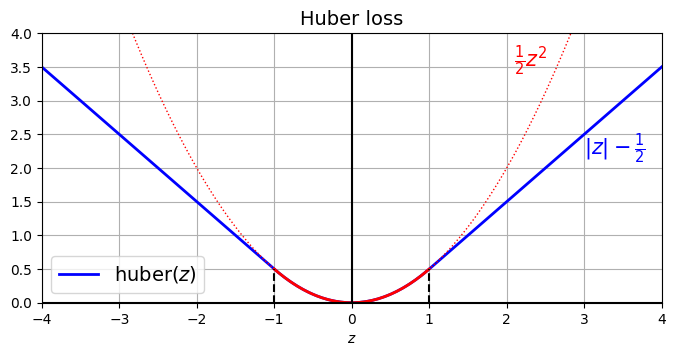

In [27]:
# Simulated Predictions
z = np.linspace(-4, 4, 200)
z_center = np.linspace(-1, 1, 200)

# Plot Layout
plt.figure(figsize=(8, 3.5))

# Plotting the Loss
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z ** 2 / 2, "r:", linewidth=1)
plt.plot(z_center, z_center ** 2 / 2, "r", linewidth=2)

# Intercepts
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "k--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "k--")

# Annotation
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.text(2.1, 3.5, r"$\frac{1}{2}z^2$", color="r", fontsize=15)
plt.text(3.0, 2.2, r"$|z| - \frac{1}{2}$", color="b", fontsize=15)
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()

**Creating a Model to work using the Custom Loss Function**

In [28]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Loading the Dataset
housing_data = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(housing_data.data, housing_data.target.reshape(-1, 1), random_state=17)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state=17)

# Scaling the Features
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_valid = std_scaler.fit_transform(X_valid)
X_test = std_scaler.fit_transform(X_test)

# Building the Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal", input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(1, activation="linear")
])

# Compiling the model
model.compile(
    loss=huber_fn,
    optimizer="adam",
    metrics=["mae"]
)

# Training the Model
custom_loss_history = model.fit(
    X_train, y_train, validation_data=(X_valid, y_valid), epochs=20
)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5781 - mae: 0.9476 - val_loss: 0.2926 - val_mae: 0.6064
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2699 - mae: 0.5721 - val_loss: 0.2348 - val_mae: 0.5337
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2221 - mae: 0.5130 - val_loss: 0.2062 - val_mae: 0.4969
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1985 - mae: 0.4766 - val_loss: 0.1912 - val_mae: 0.4739
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1887 - mae: 0.4644 - val_loss: 0.1841 - val_mae: 0.4596
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1856 - mae: 0.4578 - val_loss: 0.1789 - val_mae: 0.4557
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1804 - mae: 0.4543 - val_loss: 0.1765 - val_mae: 0.4534
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1770 - mae: 0.4498 - val_loss: 0.1772 - val_mae: 0.4559
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - lo

**Saving models with Custom Objects**
--

In [29]:
model.save("my_custom_huber_loss_model.keras")

In [30]:
# Loading a Saved Model
reloaded_model = tf.keras.models.load_model(
    "my_custom_huber_loss_model.keras",
    custom_objects={"huber_fn": huber_fn}
)

In [31]:
reloaded_model.fit(
    X_train, y_train, validation_data=(X_valid, y_valid), epochs=20
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1596 - mae: 0.4225 - val_loss: 0.1629 - val_mae: 0.4369
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1519 - mae: 0.4108 - val_loss: 0.1591 - val_mae: 0.4278
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1573 - mae: 0.4179 - val_loss: 0.1635 - val_mae: 0.4415
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1514 - mae: 0.4090 - val_loss: 0.1557 - val_mae: 0.4198
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1539 - mae: 0.4123 - val_loss: 0.1595 - val_mae: 0.4306
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1522 - mae: 0.4104 - val_loss: 0.1603 - val_mae: 0.4335
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1533 - mae: 0.4110 - val_loss: 0.1586 - val_mae: 0.4312
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1509 - mae: 0.4084 - val_loss: 0.1592 - val_mae: 0.4314
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

**Inference**
- When saving a model that utilises custom objects while training it retrains from the last update of the parameters.

**Creating a wrapper function to measure loss for custom threasholds**

In [32]:
# Custom loss function with a Wrapper for custom threasholds
def create_huber(threashold=1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        loss_is_small = tf.abs(error) < threashold
        linear_loss = threashold * tf.abs(error) - threashold ** 2 / 2
        squared_loss = tf.square(error) / 2
        return tf.where(loss_is_small, squared_loss, linear_loss)
    return huber_fn

# Compiling the Model
reloaded_model.compile(
    loss=create_huber(3.0), 
    optimizer="adam",
    metrics=["mae"]
)

# Training the Model
reloaded_model.fit(
    X_train, y_train, validation_data=(X_valid, y_valid), epochs=20
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1692 - mae: 0.4047 - val_loss: 0.1844 - val_mae: 0.4490
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1577 - mae: 0.3967 - val_loss: 0.1817 - val_mae: 0.4332
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1727 - mae: 0.4055 - val_loss: 0.1863 - val_mae: 0.4547
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1569 - mae: 0.3950 - val_loss: 0.1852 - val_mae: 0.4446
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1606 - mae: 0.3982 - val_loss: 0.1831 - val_mae: 0.4402
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1565 - mae: 0.3941 - val_loss: 0.1833 - val_mae: 0.4428
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1636 - mae: 0.4005 - val_loss: 0.1788 - val_mae: 0.4316
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1602 - mae: 0.3971 - val_loss: 0.1749 - val_mae: 0.4269
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

In [33]:
# Saving the Newer Model
reloaded_model.save("my_reloaded_model.keras")

**Inference**
- While saving using a custom object with parameters for the threashold, the threashold used during training isnt saved.
- Thus on reloading the model we need to re-parse the threashold value while compiling and training the model.

**Important**
- When saving a model, the original loss function used by the model is the namespace used by the model to save its loss data.
- Thus since the loss function used during the first saving iteration was huber_fn an object of the huber_fn is created while saving.
- Therefore new loss functions can be parsed or same loss function can be reparsed into the model when reloading the model for training.

In [34]:
reloaded_reloaded_model = tf.keras.models.load_model(
    filepath="my_reloaded_model.keras",
    custom_objects={"huber_fn": create_huber(3.0)}
)

In [35]:
reloaded_reloaded_model.fit(
    X_train, y_train, validation_data=(X_valid, y_valid), epochs=20
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1605 - mae: 0.3955 - val_loss: 0.1842 - val_mae: 0.4376
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1532 - mae: 0.3905 - val_loss: 0.1788 - val_mae: 0.4343
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1614 - mae: 0.3946 - val_loss: 0.1810 - val_mae: 0.4403
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1544 - mae: 0.3927 - val_loss: 0.1786 - val_mae: 0.4369
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1590 - mae: 0.3911 - val_loss: 0.1737 - val_mae: 0.4275
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1547 - mae: 0.3871 - val_loss: 0.1766 - val_mae: 0.4282
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1550 - mae: 0.3927 - val_loss: 0.1718 - val_mae: 0.4245
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1511 - mae: 0.3834 - val_loss: 0.1831 - val_mae: 0.4384
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

**Creating a Custom Loss Class**
--

- Custom Loss class can be created to overwrite the original output configuration used while storing a model.
- A custom loss class allows for providing a custom configuration object.

In [36]:
class MyHuberLoss(tf.keras.losses.Loss):
    def __init__(self, threashold=1.0, **kwargs):
        self.threashold = threashold
        super().__init__(**kwargs)
        
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        loss_is_small = tf.abs(error) < self.threashold
        linear_loss = self.threashold * tf.abs(error) - self.threashold ** 2 / 2
        squared_loss = tf.square(error) / 2
        return tf.where(loss_is_small, squared_loss, linear_loss)
    
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threashold": self.threashold}

In [37]:
# Building the new model
new_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:], kernel_initializer="he_normal"),
    tf.keras.layers.Dense(1)
])

# Compiling the new model
new_model.compile(
    loss=MyHuberLoss(2.0),
    metrics=["mae"],
    optimizer="adam"
)

# Training the model
new_model.fit(
    X_train, y_train, validation_data=(X_valid, y_valid), epochs=20
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9801 - mae: 1.6960 - val_loss: 0.3976 - val_mae: 0.6694
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3663 - mae: 0.6346 - val_loss: 0.2986 - val_mae: 0.5810
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2824 - mae: 0.5405 - val_loss: 0.2392 - val_mae: 0.5077
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2360 - mae: 0.4975 - val_loss: 0.2200 - val_mae: 0.4895
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2184 - mae: 0.4784 - val_loss: 0.2085 - val_mae: 0.4685
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2080 - mae: 0.4656 - val_loss: 0.2105 - val_mae: 0.4857
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1956 - mae: 0.4560 - val_loss: 0.2021 - val_mae: 0.4685
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1884 - mae: 0.4445 - val_loss: 0.1954 - val_mae: 0.4604
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

**Saving the Model utilising the custom loss class**

In [38]:
new_model.save("my_custom_loss_class_model.keras")

In [39]:
new_model_reloaded = tf.keras.models.load_model(
    "my_custom_loss_class_model.keras",
    custom_objects={"MyHuberLoss": MyHuberLoss}
)

In [40]:
new_model_reloaded.fit(
    X_train, y_train, validation_data=(X_valid, y_valid), epochs=10
)

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1662 - mae: 0.4131 - val_loss: 0.1845 - val_mae: 0.4416
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1688 - mae: 0.4128 - val_loss: 0.1810 - val_mae: 0.4344
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1682 - mae: 0.4124 - val_loss: 0.1802 - val_mae: 0.4331
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1610 - mae: 0.4020 - val_loss: 0.1832 - val_mae: 0.4405
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1644 - mae: 0.4062 - val_loss: 0.1838 - val_mae: 0.4413
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1644 - mae: 0.4113 - val_loss: 0.1837 - val_mae: 0.4388
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1595 - mae: 0.3992 - val_loss: 0.1887 - val_mae: 0.4498
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1571 - mae: 0.4014 - val_loss: 0.1868 - val_mae: 0.4455
Epoch 9/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - lo

**Inference**
- Here the Threashold of the model is retained while saving.
- This is because the loss custom loss class store the threashold as a part of the configuration of the loss class

In [41]:
new_model_reloaded.loss.threashold

2.0

**Custom Activation Functions, Initializers, Regularizers and Constraints**
--

In [42]:
# Custom Activation Function
def softplus(z):
    return tf.math.log(1.0 + tf.exp(z))

# Custom Initialisation Function
def gloriot_initilisation(shape, dtype=tf.float32):
    std = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev=std, dtype=dtype)

# Custom Regularisation
class L1Regularisation(tf.keras.regularizers.Regularizer):
    def __init__(self, factor):
        self.factor = factor
    
    def __call__(self, weights):
        return tf.reduce_sum(tf.abs(weights * self.factor))
    
    def get_config(self):
        return {"factor": self.factor}

In [43]:
tf.keras.backend.clear_session()

# Building a Model that utilises the custom functions
new_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal", input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(
        units=1, 
        activation=softplus,
        kernel_initializer=gloriot_initilisation,
        kernel_regularizer=L1Regularisation(0.01),
    )
])

# Compiling the model
new_model.compile(
    loss=MyHuberLoss(2.0),
    metrics=["mae"],
    optimizer="adam"
)

# Training the model
new_model.fit(
    X_train, y_train, validation_data=(X_valid, y_valid), epochs=5
)

# Saving the model
new_model.save("custom_activation_initialisation_regularisation_model.keras")

Epoch 1/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7710 - mae: 0.8997 - val_loss: 0.3576 - val_mae: 0.5601
Epoch 2/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3503 - mae: 0.5456 - val_loss: 0.3051 - val_mae: 0.5071
Epoch 3/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2992 - mae: 0.4945 - val_loss: 0.2761 - val_mae: 0.4802
Epoch 4/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2767 - mae: 0.4784 - val_loss: 0.2599 - val_mae: 0.4633
Epoch 5/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2680 - mae: 0.4667 - val_loss: 0.2507 - val_mae: 0.4535


In [44]:
# Reloading the model and providing all the parameters and objects required by the model
new_model_reloaded = tf.keras.models.load_model(
    filepath="custom_activation_initialisation_regularisation_model.keras",
    custom_objects={
        "MyHuberLoss": MyHuberLoss,
        "L1Regularisation": L1Regularisation,
        "softplus": softplus,
        "gloriot_initilisation": gloriot_initilisation
    }
)

# Training the model
new_model_reloaded.fit(
    X_train, y_train, validation_data=(X_valid, y_valid), epochs=15
)

Epoch 1/15
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2553 - mae: 0.4524 - val_loss: 0.2512 - val_mae: 0.4659
Epoch 2/15
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2429 - mae: 0.4472 - val_loss: 0.2461 - val_mae: 0.4624
Epoch 3/15
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2372 - mae: 0.4400 - val_loss: 0.2415 - val_mae: 0.4593
Epoch 4/15
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2383 - mae: 0.4437 - val_loss: 0.2434 - val_mae: 0.4668
Epoch 5/15
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2374 - mae: 0.4476 - val_loss: 0.2349 - val_mae: 0.4592
Epoch 6/15
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2287 - mae: 0.4380 - val_loss: 0.2329 - val_mae: 0.4592
Epoch 7/15
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2292 - mae: 0.4427 - val_loss: 0.2310 - val_mae: 0.4585
Epoch 8/15
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2256 - mae: 0.4408 - val_loss: 0.2286 - val_mae: 0.4564
Epoch 9/15
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

**Important**
- Similar to the difference in control between the custom loss function and the custom loss class we can implement objects of other hyperparameters for added functionality.
- **`keras.regularizers.Regularizer`**, **`keras.constraints.Constraint`**, **`keras.initializers.Initializer`**, **`keras.layers.Layer`** can all be utilised to create custom objects with additional control and hyperparameters retention abilities when retrieving a saved model.
- When working with **`Losses, Layers and Models`** the **`call()`** needs to be defined in the class.
- When working with **`Initializers, Constraints and Regularizers`** the **`__call__()`** needs to be defined in the class.

**Working with Custom Metrics**
--

**Important (Difference between Loss and Metrics)**
- Loss doesnt need to be human understandable, needs to be differentiable everywhere and gradients must not be 0.
- Metrics should be understandable to humans, they need not be differentiable or have derivatives everywhere.
- The sole purpose of metrics is to provide a high level understanding of the performance of the model to perform diagnostics.
- HuberLoss used above can be utilised perfectly as a metric and a loss function.

In [45]:
tf.keras.backend.clear_session()

# New Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal", input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(1)
])

# Compiling the model using HuberLoss as a Metric and as a Loss function
model.compile(
    loss=MyHuberLoss(2.0),
    metrics=[MyHuberLoss(2.0)],
    optimizer="adam"
)

# Training the model
model.fit(
    X_train, y_train, validation_data=(X_valid, y_valid), epochs=20
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.5716 - my_huber_loss_1: 1.5716 - val_loss: 0.3796 - val_my_huber_loss_1: 0.3796
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3582 - my_huber_loss_1: 0.3582 - val_loss: 0.3001 - val_my_huber_loss_1: 0.3001
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3007 - my_huber_loss_1: 0.3007 - val_loss: 0.2529 - val_my_huber_loss_1: 0.2529
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2380 - my_huber_loss_1: 0.2380 - val_loss: 0.2288 - val_my_huber_loss_1: 0.2288
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2303 - my_huber_loss_1: 0.2303 - val_loss: 0.2168 - val_my_huber_loss_1: 0.2168
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2075 - my_huber_loss_1: 0.2075 - val_loss: 0.2192 - val_my_huber_loss_1: 0.2192
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1979 - my_huber_loss_1: 0.1979 - val_loss: 0.2148 - val_my_huber_loss_1: 0.2148
Epoch 

## Streaming Metrics and The Keras Precision Score class for Classfiers

**Streaming Metric**
- A streaming metric is one that can be dynamically updated as and when the values are parsed to the precision object.

In [46]:
# Creating the precision object
myPrecisionObject = tf.keras.metrics.Precision()

# Called a function that takes Labels, Predictions
sample1 = myPrecisionObject([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1])
print("Result after first parse\n", sample1)

sample2 = myPrecisionObject([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0])
print("Result after second parse\n", sample2)

Result after first parse
 tf.Tensor(0.8, shape=(), dtype=float32)
Result after second parse
 tf.Tensor(0.5, shape=(), dtype=float32)


In [47]:
print("Final Precision Score: ", myPrecisionObject.result())

Final Precision Score:  tf.Tensor(0.5, shape=(), dtype=float32)


**Inference**
- Due to the dynamic updates to the scores from the streamline metric we can see that the precision score has changed after each pass.
- First Pass Precision: 80%
- Second Pass Precision: 50%
- Final Score: 50%

In [48]:
# Viewing the Variables used for Precision Tracking
print(myPrecisionObject.variables)

# The Precision Variables can also be reset
# myPrecisionObject.reset_states()

[<KerasVariable shape=(1,), dtype=float32, path=precision/true_positives>, <KerasVariable shape=(1,), dtype=float32, path=precision/false_positives>]


**Additional Functionality**
- Once again additional functionality / customisation is accommodated to build custom precision objects by creating a subclass of the Keras API similar to the approach taken in creating custom loss classes.
- Here the **`tf.keras.metrics.Metric`** class is utilised.

In [49]:
class MyHuberMetric(tf.keras.metrics.Metric):
    def __init__(self, threashold=1.0, **kwargs):
        super().__init__(**kwargs)
        self.threashold = threashold
        self.huber_fn = create_huber(threashold)
        self.total = self.add_weight(name="total", initializer="zeros")
        self.count = self.add_weight(name="count", initializer="zeros")
        
    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        self.total.assign_add(tf.reduce_sum(metric))
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))
        
    def result(self):
        return self.total / self.count
    
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threashold": self.threashold}

**Working with the Custom Subclass**

In [50]:
# Creating an Instance of the Class
metric = MyHuberMetric(2.0)

metric_score1 = metric(tf.constant([[2.]]), tf.constant([[10.]]))
print("Huber Metric Score: ", metric_score1)

metric_score2 = metric(tf.constant([[0.], [5.]]), tf.constant([[1.], [9.25]]))
print("Huber Metric Score: ", metric_score2)

# Result
print("Huber Metric Result: ", metric.result())

Huber Metric Score:  tf.Tensor(14.0, shape=(), dtype=float32)
Huber Metric Score:  tf.Tensor(7.0, shape=(), dtype=float32)
Huber Metric Result:  tf.Tensor(7.0, shape=(), dtype=float32)


In [51]:
# Building a Model to utilise the custom metric
custom_metric_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal", input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(1)
])

# Compiling the Model
custom_metric_model.compile(
    loss=MyHuberLoss(2.0),
    metrics=[MyHuberMetric(2.0)],
    optimizer="adam"
)

# Training the Model
custom_metric_model.fit(
    X_train, y_train, validation_data=(X_valid, y_valid), epochs=20
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5760 - my_huber_metric_1: 1.5760 - val_loss: 0.4338 - val_my_huber_metric_1: 0.4338
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4192 - my_huber_metric_1: 0.4192 - val_loss: 0.3040 - val_my_huber_metric_1: 0.3040
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2900 - my_huber_metric_1: 0.2900 - val_loss: 0.2425 - val_my_huber_metric_1: 0.2425
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2419 - my_huber_metric_1: 0.2419 - val_loss: 0.2291 - val_my_huber_metric_1: 0.2291
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2198 - my_huber_metric_1: 0.2198 - val_loss: 0.2091 - val_my_huber_metric_1: 0.2091
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2211 - my_huber_metric_1: 0.2211 - val_loss: 0.2101 - val_my_huber_metric_1: 0.2101
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2060 - my_huber_metric_1: 0.2060 - val_loss: 0.2065 - val_my_h

In [52]:
# Saving the Model and Reloading it
custom_metric_model.save("My_Custom_Metric_Model.keras")

reloaded_custom_metric_model = tf.keras.models.load_model(
    filepath="My_Custom_Metric_Model.keras",
    custom_objects={
        "MyHuberLoss": MyHuberLoss,
        "MyHuberMetric": MyHuberMetric,
    }
)

reloaded_custom_metric_model.fit(
    X_train, y_train, validation_data=(X_valid, y_valid), epochs=10
)

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1736 - my_huber_metric_1: 0.1736 - val_loss: 0.1861 - val_my_huber_metric_1: 0.1861
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1773 - my_huber_metric_1: 0.1773 - val_loss: 0.1887 - val_my_huber_metric_1: 0.1887
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1768 - my_huber_metric_1: 0.1768 - val_loss: 0.1886 - val_my_huber_metric_1: 0.1886
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1790 - my_huber_metric_1: 0.1790 - val_loss: 0.1848 - val_my_huber_metric_1: 0.1848
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1654 - my_huber_metric_1: 0.1654 - val_loss: 0.1884 - val_my_huber_metric_1: 0.1884
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1667 - my_huber_metric_1: 0.1667 - val_loss: 0.1815 - val_my_huber_metric_1: 0.1815
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1684 - my_huber_metric_1: 0.1684 - val_loss: 0.1919 - val_my_h

**Designing Custom Layers**
--

- Custom Layers can be designed to carry parameters or be initialised without parameters.

**Layers without parameters**
- Custom Layers which do not carry parameters can be initialised using **`tf.keras.layers.Lambda()`**.
- The following lambda layer can be used in all of the Keras API's.

**Layers with parameters**
- Custom layers which carry parameters should be initialised as instances of a custom object which is a subclass of the **`tf.keras.layers.Layer`** class
- This process is again inline with the definition of custom loss class, initializers, regularizers and ...

In [53]:
# Defining a Layer without parameters
exponential_layer = tf.keras.layers.Lambda(lambda x: tf.exp(x))
# exponential_layer([-1, 0, 1])

In [54]:
# Using the custom defined exponential layer in a model
exp_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal", input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(1),
    exponential_layer
])

# Compiling the Model
exp_model.compile(
    loss="mse",
    optimizer="adam"
)

# Training the model
exp_model.fit(
    X_train, y_train, validation_data=(X_valid, y_valid), epochs=20
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9409 - val_loss: 1.4977
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.2920 - val_loss: 1.1126
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9284 - val_loss: 0.8730
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7270 - val_loss: 0.6786
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6078 - val_loss: 0.5948
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4978 - val_loss: 0.5572
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4589 - val_loss: 0.4969
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4440 - val_loss: 0.5105
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4250 - val_loss: 0.4933
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4159 - val_loss: 0.5294
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4207 - val_loss: 0.5013
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

In [55]:
# Creating layers with Parameters using subclass of the Keras Layers API
class MyDense(tf.keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        
        # Inheriting all the parent properties from the API
        super().__init__(**kwargs)
        
        # Defining the other instance variables
        self.units = units
        self.activation = tf.keras.activations.get(activation)
        
    def build(self, batch_input_shape):
        
        # Defining the size and initialising the weight matrix
        self.kernel = self.add_weight(
            name="kernel", shape=[batch_input_shape[-1], self.units], initializer="he_normal"
        )
        
        # Defining the size and initializing the bias matrix
        self.bias = self.add_weight(
            name="bias", shape=[self.units], initializer="zeros"
        )
        
    def call(self, X):
        
        # Computing the values for the layer based on the recieved input
        return self.activation(X @ self.kernel + self.bias)
    
    def get_config(self):
        
        # Stores the updated configuration of the layer with its units and activation
        base_config = super().get_config()
        return {**base_config, "units": self.units, "activation": tf.keras.activations.serialize(self.activation)}

**Important**
- **kwargs**: Takes care of all the other necessary instance variables required by the layer such as `input_shape`, `trainable`, `name`, ...
- **build()**: Is only called by the class when the layer is being created for the first time. It ensures all the layer sizes are inaccordance to the outflux from the previous layer and the outflux of the current layer.
- **call()**: Performs the necessary operation to complete forward propagation for the current layer.

In [56]:
# Using the Subclass from above to build a model
custom_layer_model = tf.keras.models.Sequential([
    MyDense(30, activation="relu", input_shape=X_train.shape[1:]),
    MyDense(1)
])

# Compiling the model
custom_layer_model.compile(
    loss="mse",
    optimizer="nadam"
)

# Training the model
custom_layer_model.fit(
    X_train, y_train, validation_data=(X_valid, y_valid), epochs=20
)

Epoch 1/20


/tmp/ipykernel_18/2696998629.py:6: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.3217 - val_loss: 0.7967
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6968 - val_loss: 0.6490
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5913 - val_loss: 0.5579
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5269 - val_loss: 0.5091
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4765 - val_loss: 0.4693
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4331 - val_loss: 0.4498
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4137 - val_loss: 0.4340
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4105 - val_loss: 0.4263
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4097 - val_loss: 0.4195
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3901 - val_loss: 0.4336
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4083 - val_loss: 0.4257
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.

In [57]:
# Saving the model and reloading the configuration of the model
custom_layer_model.save("my_custom_layer_model.keras")

reloaded_custom_layer_model = tf.keras.models.load_model(
    filepath="my_custom_layer_model.keras",
    custom_objects={
        "MyDense": MyDense
    }
)

reloaded_custom_layer_model.fit(
    X_train, y_train, validation_data=(X_valid, y_valid), epochs=10
)

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3764 - val_loss: 0.4079
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3791 - val_loss: 0.3993
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3586 - val_loss: 0.3887
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3568 - val_loss: 0.4097
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3515 - val_loss: 0.4069
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3624 - val_loss: 0.4112
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3486 - val_loss: 0.4039
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3413 - val_loss: 0.4048
Epoch 9/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3576 - val_loss: 0.3917
Epoch 10/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3512 - val_loss: 0.3920


**Important**
- Thus the saved model has retained the hyperparameters of each layer.
- It has also retained the configuration of each activation function used in the layers of the model.

**Custom Layers with Multiple Inputs**

- When working with a layer that takes multiple inputs we can no longer utilise the Keras Sequential API.
- The below layer can be thus used in the Keras Functional and Model Subclassing API's to build a deep learning model.

In [58]:
class MultiInputLayer(tf.keras.layers.Layer):
    
    # Since the layer takes multiple inputs, the call method expects a tuple of all the necessary inputs
    def call(self, X):
        
        # Expecting two inputs
        X1, X2 = X
        print("Shape of Input - 1: ", X1.shape)
        print("Shape of Input - 2: ", X2.shape)
        
        # Output from the given layer
        return X1 + X2, X1 * X2, X1 ** 2 - X1

In [59]:
# Building a model
input_1 = tf.keras.layers.Input(shape=[3])
input_2 = tf.keras.layers.Input(shape=[3])

# Chaining the Inputs to the Custom Layer
MultiInputLayer()((input_1, input_2))

Shape of Input - 1:  (None, 3)
Shape of Input - 2:  (None, 3)


(<KerasTensor shape=(None, 3), dtype=float32, sparse=False, name=keras_tensor_23>,
 <KerasTensor shape=(None, 3), dtype=float32, sparse=False, name=keras_tensor_24>,
 <KerasTensor shape=(None, 3), dtype=float32, sparse=False, name=keras_tensor_25>)

In [60]:
output_layer = MultiInputLayer()((input_1, input_2))

# Multiple Input Model
multi_input_model = tf.keras.models.Model(inputs=[input_1, input_2], outputs=output_layer)
print()
multi_input_model.summary()

Shape of Input - 1:  (None, 3)
Shape of Input - 2:  (None, 3)



Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_5       │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_input_layer_1 │ [(None, 3),       │          0 │ input_layer_4[0]… │
│ (MultiInputLayer)   │ (None, 3), (None, │            │ input_layer_5[0]… │
│                     │ 3)]               │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

**Important**
- If the model provides asymmetric input sizes then a custom `compute_output_shape()` must be defined to provide keras an idea of the output shape from the custom layer

In [61]:
# Using the Multiple Input Model
X1, X2 = np.array([1, 2, 3]), np.array([4, 5, 6])
MultiInputLayer()((X1, X2))

Shape of Input - 1:  (3,)
Shape of Input - 2:  (3,)


(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([5., 7., 9.], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 4., 10., 18.], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0., 2., 6.], dtype=float32)>)

**Creating a Custom Layer with Different Behaviours**

- A custom layer can also inhibit training specific and testing specific behaviour.
- This is done by adding additional arguments to the call() and utilising the arguments in the call().

In [62]:
class GaussianNoiseLayer(tf.keras.layers.Layer):
    def __init__(self, stddev, **kwargs):
        super().__init__(**kwargs)
        self.stddev = stddev
        
    def call(self, X, training=None):
        
        # Adds additional Gaussian Noise to the data if the layer was used during training
        if training:
            noise = tf.random.normal(tf.shape(X), stddev=self.stddev)
            return X + noise
        
        # Returns the original values of the layer if it wasnt called during training
        return X

In [63]:
# Building a model to use the Gaussian Layer
gaussian_model = tf.keras.models.Sequential([
    GaussianNoiseLayer(stddev=1.0, input_shape=X_train.shape[1:]),
    MyDense(30, activation="relu"),
    MyDense(1)
])

# Compiling the model
gaussian_model.compile(
    loss="mse",
    optimizer="adam"
)

# Training the model
gaussian_model.fit(
    X_train, y_train, validation_data=(X_valid, y_valid), epochs=20
)

Epoch 1/20


/tmp/ipykernel_18/3529310901.py:3: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.7232 - val_loss: 2.0127
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.7347 - val_loss: 1.6159
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.3509 - val_loss: 1.3166
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.3279 - val_loss: 1.0894
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.2650 - val_loss: 0.9606
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0566 - val_loss: 0.8753
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.2741 - val_loss: 0.8013
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.0922 - val_loss: 0.7782
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.0402 - val_loss: 0.7478
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.9735 - val_loss: 0.7459
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.0225 - val_loss: 0.7463
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.

In [64]:
# Evaluating the Model
gaussian_model.evaluate(X_test, y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 0.7097


0.7246128916740417

**Fin ✨**
--

## I had a lot of fun creating this notebook and diving deeper into the TensorFlow framework and the Keras API.
## Hope you had just as much fun reading alongside ✌️